# IMPORT LIBRARIES

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=e6bddd5d347288d6b05819fedfa01e01ae719b01e70a9664fc70e15003a5fe94
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
import seaborn as sn

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# LOADING DATA

In [4]:
data = yf.download(tickers ='EURUSD=X', end= '2022-11-11')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['SMA']= ta.sma(data.Close, length=10)
data['EMA']= ta.ema(data.Close, length= 10)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

macd = data.ta.macd(fast =12, slow =26, signal =9)
BB = data.ta.bbands(length=12, std =2)
ADX = data.ta.adx(length = 20)
ROC = data.ta.roc(length = 12)
data = pd.concat([data, macd, BB, ADX, ROC], axis = 1)

In [6]:
data['returns'] = (data['Adj Close']/data['Adj Close'].shift(1)) -1
data['returnsclass'] = [1 if data.returns[i]>0 else 0 for i in range(len(data))]

In [7]:
data.drop(['Volume'], axis=1, inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data_set = data.iloc[:, ]#.values
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2004-06-25,1.217093,1.220301,1.211299,1.220301,1.220301,54.911255,1.211252,1.213470,1.212295,1.219270,1.228477,0.001650,0.000118,0.001532,1.198109,1.210410,1.222711,2.032554,0.902022,10.529251,19.865586,19.370648,1.328905,0.002380,1
2004-06-28,1.217493,1.222703,1.212797,1.218695,1.218695,53.966191,1.212501,1.214420,1.212905,1.219258,1.228347,0.001964,0.000346,0.001618,1.197928,1.211060,1.224191,2.168541,0.790725,10.197999,20.052943,18.542993,0.643457,-0.001316,0
2004-06-29,1.218695,1.219096,1.207496,1.209804,1.209804,48.968246,1.211821,1.213581,1.212610,1.219071,1.228101,0.001478,-0.000112,0.001590,1.199894,1.211751,1.223609,1.957117,0.417904,9.797026,19.049638,19.901794,0.690796,-0.007295,0
2004-06-30,1.209497,1.220301,1.206797,1.218398,1.218398,53.434557,1.213591,1.214457,1.213161,1.219058,1.227973,0.001766,0.000141,0.001625,1.200897,1.212768,1.224639,1.957702,0.737134,9.345300,18.464605,18.752050,1.011273,0.007103,1
2004-07-01,1.218294,1.220807,1.213902,1.216205,1.216205,52.185715,1.214872,1.214775,1.213451,1.219001,1.227817,0.001797,0.000138,0.001660,1.200904,1.212734,1.224565,1.950986,0.646672,8.885485,18.128930,18.186492,-0.032835,-0.001800,0


In [10]:
data_set=data_set.drop(data_set.index[0:2445]) #matching dataset with Sentiment analysis

In [11]:
#X being capitalized implies a 2D array, while lowercase y implies a 1D array.
X= data_set.iloc[:,0:23]

In [12]:
X

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12
Date,,,,,,,,,,,,,,,,,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,61.180787,1.368764,1.369946,1.364524,1.347592,1.339880,0.005894,0.002006,0.003889,1.350766,1.367213,1.383660,2.405920,0.704164,15.357994,22.396920,14.854837,1.220049
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,62.811095,1.370973,1.371100,1.365645,1.348160,1.340363,0.006076,0.001750,0.004326,1.351940,1.368537,1.385135,2.425581,0.733614,15.493713,21.662505,15.031101,1.168472
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,63.392301,1.372779,1.372196,1.366738,1.348734,1.340849,0.006216,0.001512,0.004704,1.354059,1.370088,1.386118,2.339867,0.719524,15.622646,21.053065,14.608225,1.370242
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,54.028961,1.373764,1.371523,1.366905,1.349125,1.341216,0.005567,0.000690,0.004877,1.358317,1.371279,1.384242,1.890574,0.392590,14.973438,19.547899,18.542880,1.055106
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,51.287513,1.373623,1.370442,1.366779,1.349451,1.341538,0.004762,-0.000092,0.004854,1.360510,1.371822,1.383133,1.649117,0.224048,14.297832,18.583230,19.134403,0.479314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,43.011123,0.990533,0.986115,0.985942,1.007830,1.025200,-0.000073,-0.000374,0.000301,0.969172,0.988323,1.007473,3.875445,0.151205,10.588025,18.945042,19.588859,-1.158250
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,53.118878,0.991220,0.987345,0.986603,1.007534,1.024771,0.000468,0.000133,0.000335,0.971761,0.989675,1.007590,3.620319,0.589474,10.311693,19.627748,17.736596,1.662092
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,57.196524,0.992542,0.989985,0.988056,1.007421,1.024468,0.001603,0.001014,0.000588,0.974118,0.991673,1.009228,3.540559,0.790236,10.453165,21.704507,16.662629,2.451556


# SUPPORT VECTOR MACHINE

In [15]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = data_set.iloc[:, :-1]
target = data_set['returnsclass'].values

In [18]:
# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [20]:
# Create and train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9161290322580645


In [29]:
# Calculate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Classification Report:
              precision    recall  f1-score   support

           0     0.8889    0.9474    0.9172       228
           1     0.9459    0.8861    0.9150       237

    accuracy                         0.9161       465
   macro avg     0.9174    0.9167    0.9161       465
weighted avg     0.9180    0.9161    0.9161       465

Confusion Matrix:
[[216  12]
 [ 27 210]]


In [30]:
# Prepare the input data for prediction (assuming X_test represents the most recent data available)
input_data = scaled_features[-1]  # Select the most recent data point as input data

# Make the prediction
prediction = model.predict([input_data])

# Interpret the prediction
if prediction == 1:
    price_movement = "Positive"
else:
    price_movement = "Negative"

# Print the predicted price movement
print("Next day's price movement:", price_movement)

Next day's price movement: Negative


# OTHER METHODS

In [ ]:
#Standardize and scale X
#standardize and scale X. This is an important technique in pre-processing and a common requirement for many machine learning models. 
#Standardizing data commonly means manipulating it until it has 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
y = data_set['returnsclass']

In [ ]:
#Split X and y into training data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)

In [ ]:
#These imports are for various prediction models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Select the ones want to use here
model = RandomForestClassifier()
model.fit(X_train, y_train) #fit() is the training method

RandomForestClassifier()

In [ ]:
#Generate predictions using trained model
prediction = model.predict(X_test)
prediction[0:5]

array([0, 0, 0, 0, 0])

We can now compare these predictions against our test data to gauge the accuracy of our model. We can do this by generating a confusion matrix, a table which summarizes the performance of the model by classifying each prediction based on its analogous value in the test data. There are four potential classifications for each predicted value:

True Positive - model predicts positive, test is also positive
False Positive - model predicts positive, test is negative
True Negative - model predicts negative, test is also negative
False Negative - model predicts negative, test is postitive
True Positives and True Negatives represent when the model predicts correctly, while False Positives and False Negatives represent the opposite, when the model's prediction is incorrect. Accuracy, then, can be calculated as the percentage of predictions which are True Positive or True Negative.

In [ ]:
#Generate a confusion matrix to assess performance
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()

print('True Positive (TP)  = ', TP)
print('False Positive (FP) = ', FP)
print('True Negative (TN)  = ', TN)
print('False Negative (FN) = ', FN)

accuracy =  (TP+TN) / (TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive (TP)  =  122
False Positive (FP) =  53
True Negative (TN)  =  193
False Negative (FN) =  97
Accuracy of the binary classification = 0.677


In [ ]:
#Importing each model

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
#Calculating their accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key]= f1_score(predictions, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Printing assessments of each model
df_model = pd.DataFrame(index = models.keys(), columns = ['Accuracy', 'Precision', 'Recall', 'f1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1'] = f1.values()
df_model

,Accuracy,Precision,Recall,f1
Logistic Regression,0.759140,0.698630,0.768844,0.732057
Support Vector Machines,0.774194,0.739726,0.771429,0.755245
Decision Trees,0.630108,0.575342,0.614634,0.594340
Random Forest,0.683871,0.579909,0.697802,0.633416
Naive Bayes,0.608602,0.415525,0.627586,0.500000
K-Nearest Neighbor,0.630108,0.488584,0.640719,0.554404


[Text(0.5, 25.722222222222214, 'actual'),
 Text(58.22222222222221, 0.5, 'expected')]

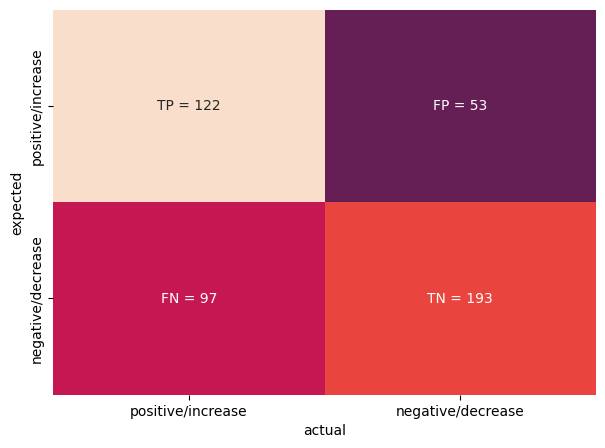

In [ ]:
#First, we cast the values representing the number of each each result to strings
#so they can be used as labels.
sTP = str(TP)
sFP = str(FP)
sTN = str(TN)
sFN = str(FN)

#vcm here is intended to stand for "Visual Confusion Matrix"
#as this is the variable we will be manipulating to generate the confusion matrix graph.

#This line is intended to reformat our earlier confusion matrix data
#into a pandas DataFrame, with labels attached for its rows and columns
vcm = pd.DataFrame(cm, index = ['positive/increase', 'negative/decrease'], columns = ['positive/increase', 'negative/decrease'])

#Here we assign the labels for each cell of the graph.
labels = np.array([['TP = ' + sTP, 'FP = ' + sFP], ['FN = ' + sFN, 'TN = ' + sTN]])

#Then setup the matplotlib figure and adjust the graph's size.
fig, ax = plt.subplots(figsize = (7, 5))

#And finally create the graph using a seaborn heatmap.
vcm = sn.heatmap(vcm, vmin = 0, vmax = 200, annot = labels, fmt = '', cbar = False)
vcm.set(xlabel = 'actual', ylabel = 'expected')